# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



## Data and Setup

____
** Importing numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Importing visualization libraries. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Reading in the csv file to a dataframe called df **

In [3]:
df=pd.read_csv('911.csv')

** Checking the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


** Checking the head of df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Data Analysis

** What are the top 5 zipcodes for 911 calls? **

In [6]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

** How many unique title codes are there? **

In [8]:
df['title'].nunique()

148

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [9]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

** What is the most common Reason for a 911 call based off of this new column? **

In [10]:
# From value_counts() function we can get to that EMS is the most common reason for 911 calls.

df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

** Using seaborn to create a countplot of 911 calls by Reason. **

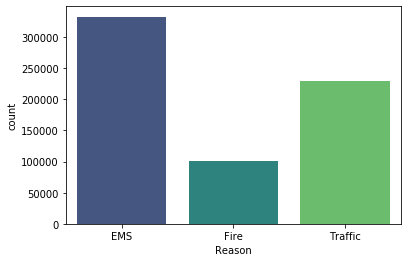

In [11]:
sns.countplot(x='Reason',data=df,palette='viridis')

# From this countplot we can infer that 'EMS' is the reason for most number of 911 calls. 

** Using [pd.to_datetime]to convert the column 'timeStamp' from strings to DateTime objects. **

In [12]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

**Now that the timestamp column are actually DateTime objects, I have created 3 new columns called Hour, Month, and Day of Week. **

In [13]:
df['Hour'] = df['timeStamp'].dt.hour
df['month'] = df['timeStamp'].dt.month
df['Day of Week']=df['timeStamp'].dt.dayofweek

** Here we can see the Day of Week is an integer between 0-6. Using the .map() with this dictionary to map the actual string names to the day of the week: **

In [14]:
dmap_dayofweek = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap_dayofweek)

** Using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

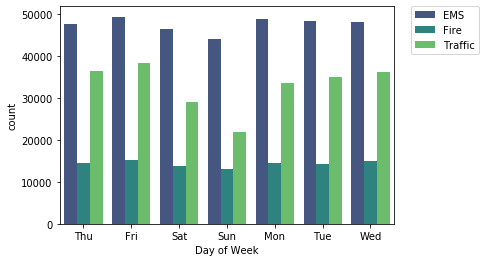

In [15]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** Using seaborn to create a countplot of the month column with the hue based off of the Reason column indicating the count of calls per month **

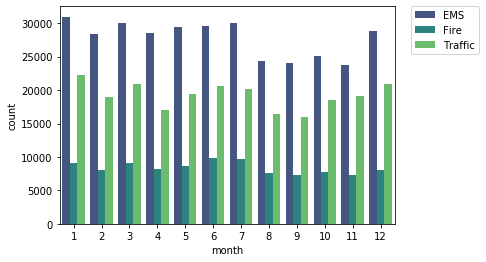

In [16]:
sns.countplot(x='month',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** Creating a new column called 'Date' that contains the date from the timeStamp column. ** 

In [17]:
df['Date'] = df['timeStamp'].dt.date

** Grouping the Date column with the count() aggregate and creating a plot of counts of 911 calls.**

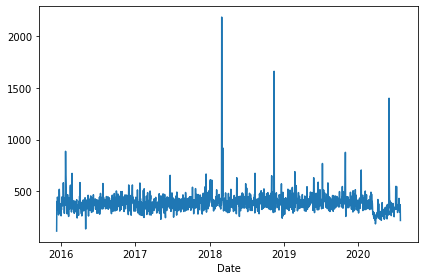

In [18]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

** Recreating this plot by creating 3 separate plots with each plot representing a Reason for the 911 call**

Text(0.5, 1.0, 'Traffic')

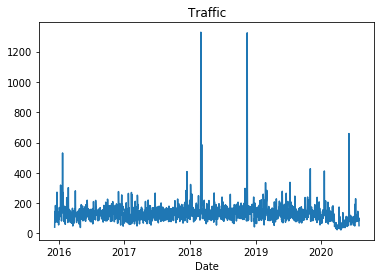

In [19]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')

Text(0.5, 1.0, 'EMS')

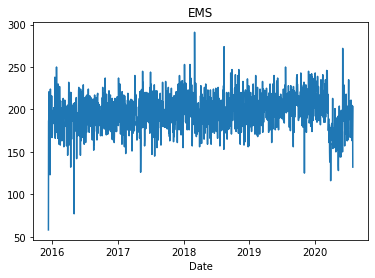

In [20]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')

Text(0.5, 1.0, 'Fire')

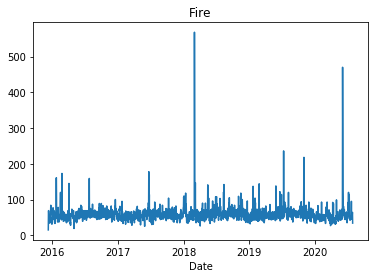

In [21]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')

____
** Creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.*

In [22]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


** Creating a HeatMap using this new DataFrame. **

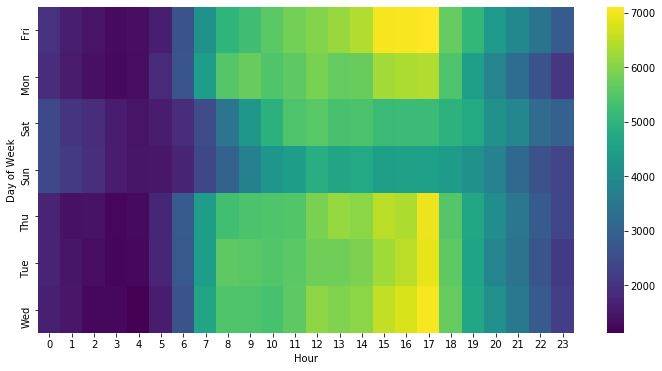

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

# From the below heatmap we can infer that 911 calls are because of the reasons: 'EMS', 'Fire', and 'Traffic' which are prominently during the day times between 10am and 17pm. Another interesting information from the plot is that there have been only fewer 911 calls on Sunday's and Saturday's.

** Creating a clustermap using this DataFrame. **

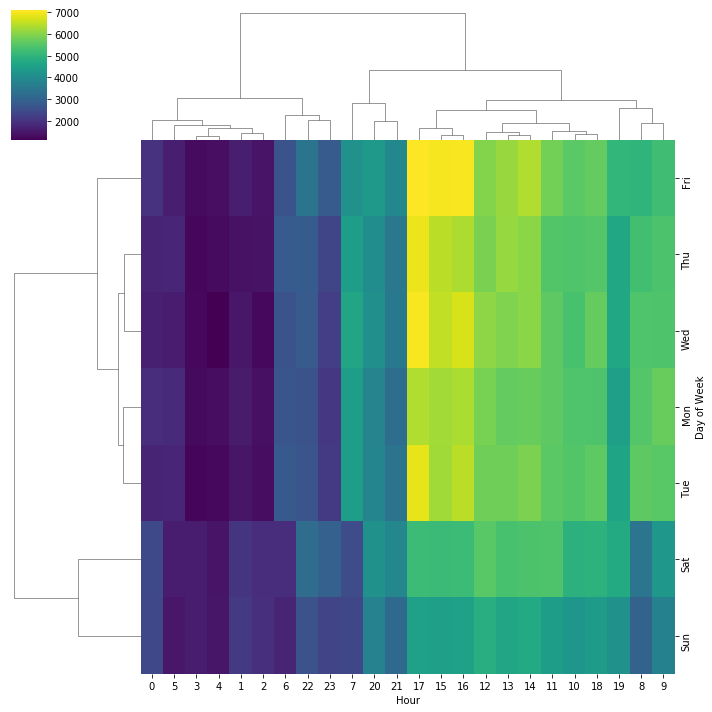

In [24]:
sns.clustermap(dayHour,cmap='viridis')

# In this clustered heatmap we have the information based on the number of 911 calls per day over the range of hours. We can make out that Friday's, Thursday's, Wednesday's, Monday's and Tuesday's have the maximum number of calls between 10am to 17pm.

** Recreating these same plots and operations, for a DataFrame that shows the Month as the column. **

In [25]:
dayMonth = df.groupby(by=['Day of Week','month']).count()['Reason'].unstack()
dayMonth.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


** Creating a HeatMap using this new DataFrame. **

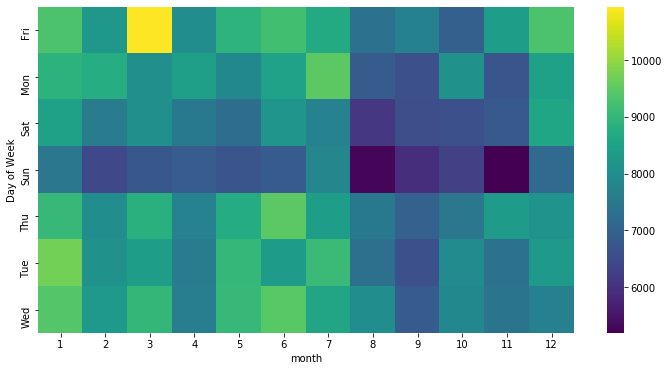

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

# The number of 911 calls per day are high in the months from January to July and when you take into account from August till December the number of calls gradually decreases. On Friday, in the month of march records the highest number of 911 calls.

** Creating a clustermap using this DataFrame. **

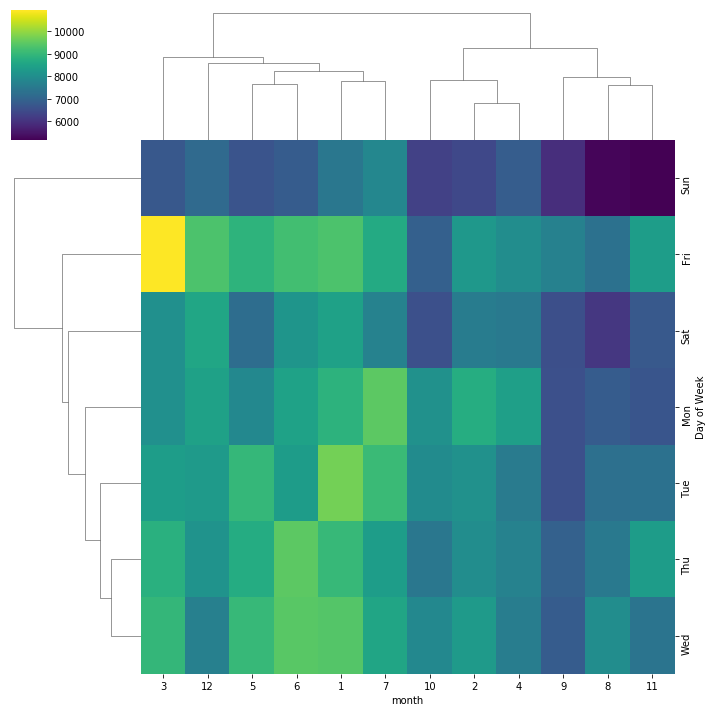

In [27]:
sns.clustermap(dayMonth,cmap='viridis')